In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('spam.csv')

In [37]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [39]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [40]:
df.sample(5)

,v1,v2
1029,ham,"Its good, we'll find a way"
2779,ham,Well I might not come then...
2925,ham,Im done. Just studyn in library
3530,ham,Prepare to be pounded every night...
1708,ham,How's my loverboy doing ? What does he do that...


Since we have very less values in column 3, column 4 and column 5 so we will drop them

## Renaming the columns

In [41]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [42]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Now we will convert output variables in numeric form.

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [44]:
df['target'] = encoder.fit_transform(df['target'])

In [45]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Checking for missing values

In [46]:
df.isnull().sum()

target    0
text      0
dtype: int64

Checking for duplicate values

In [47]:
df.duplicated().sum()

403

Removing duplicate values

In [48]:
df = df.drop_duplicates(keep='first')

In [49]:
df.duplicated().sum()

0

In [50]:
df.shape

(5169, 2)

# EDA

In [51]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

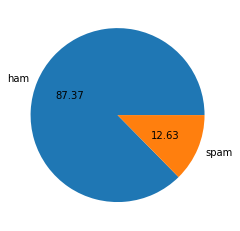

In [52]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

We have an imbalanced data where 87.37% of data is not spam and 12.63% of data is spam.

### Creating new columns

In [53]:
df['num_character'] = df['text'].apply(len)

In [54]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [55]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [56]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [57]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [58]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### Description of new columns

In [59]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Description of Ham messages

In [60]:
df[df['target'] == 0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Description of Spam messages

In [61]:
df[df['target'] == 1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

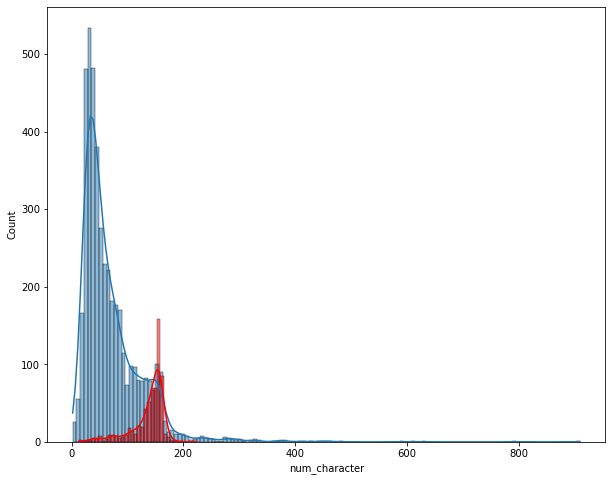

In [62]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['target'] == 0]['num_character'],kde=True)
sns.histplot(df[df['target'] == 1]['num_character'],kde=True,color='red')

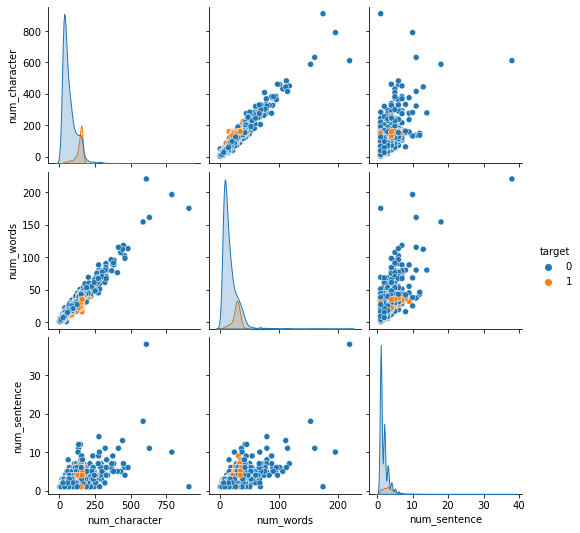

In [63]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

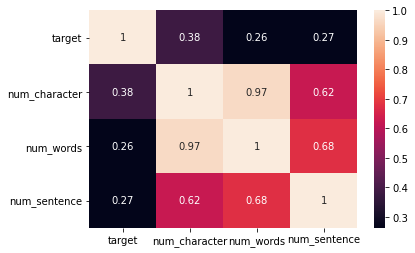

In [64]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

#### Step 1. Lowercasing the data
#### Step 2. Removing stopwords
#### Step 3. Applying stemming

In [66]:
ps = PorterStemmer()

In [67]:
def transform_text(text):
    
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [68]:
df['transformed_text'] = df['text'].apply(transform_text)

In [69]:
df['transformed_text'][6]

'even brother like speak treat like aid patent'

In [70]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Creating Wordcloud to get the words that occurs frequently in the spam messages.

In [71]:
wc = WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [72]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep='') )

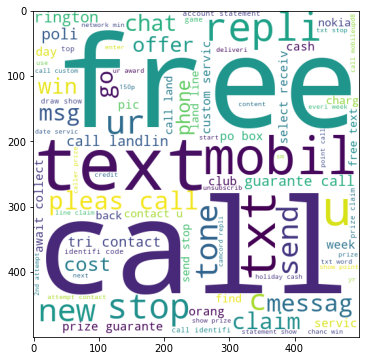

In [73]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

### Creating Wordcloud to get the words that occurs frequently in the ham messages.

In [74]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=''))

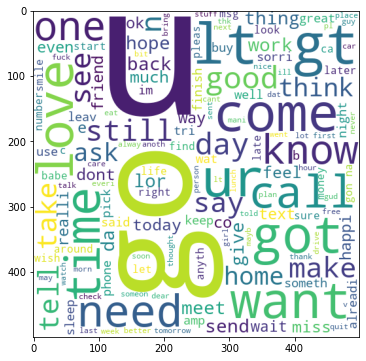

In [75]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

#### Creating a list which contains all the words from the spam messages

In [76]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [77]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [78]:
len(spam_corpus)

9941

#### 30 Most frequent occuring words from the spam messages.

In [79]:
from collections import Counter

In [80]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

#### Bar plot of 30 most frequent occuring words from the spam messages.

C:\Users\Nidheesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


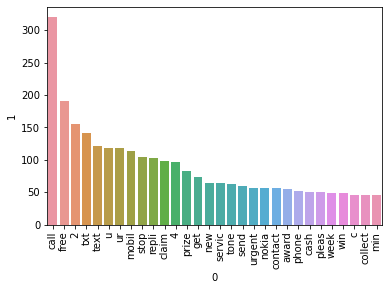

In [81]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#### Creating a list which contains all the words from the ham messages

In [82]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [83]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [84]:
len(ham_corpus)

35305

#### Bar plot of 30 most frequent occuring words from the ham messages.

C:\Users\Nidheesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


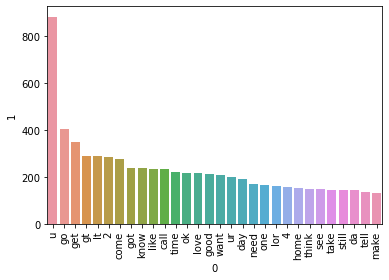

In [85]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

### Bag of Words

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [87]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [88]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
x.shape

(5169, 6677)

In [90]:
y = df['target'].values

In [91]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [183]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [94]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


### we will not consider accuracy because of imbalanced data, so we use precision score

In [96]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [97]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


### Tfidf

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [193]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [194]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [195]:
x.shape

(5169, 6677)

In [196]:
Y = df['target'].values

In [197]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [199]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [200]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [201]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Trying another models for improving performance.

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [203]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

### Creating a dictionary of different algorithms

In [204]:
clfs = {
    'Naive Bayes'         : mnb,
    'Logistic Regression' : lrc,
    'SVM'                 : svc,
    'Decision Tree'       : dtc,
    'KN Neighbors'        : knc,
    'Random Forest'       : rfc,
    'AdaBoost'            : abc,
    'Bagging Classifier'  : bc,
    'Gradient Boost'      : gbdt,
    'XGBoost'             : xgb
    
}

In [205]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [206]:
Y_train


array([0, 0, 0, ..., 0, 0, 0])

In [207]:
from sklearn.metrics import accuracy_score,precision_score

In [208]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_predt = clf.predict(x_test)
    acc = accuracy_score(y_test,y_predt)
    prec = precision_score(y_test,y_predt)
    
    return acc,prec

In [209]:
train_classifier(dtc,X_train,Y_train,X_test,Y_test)

(0.9323017408123792, 0.8469387755102041)

### Performance of all the algorithms

In [210]:
acc_scores = []
prec_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print(name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()
    
    acc_scores.append(current_accuracy)
    prec_scores.append(current_precision)

Naive Bayes
Accuracy -  0.971953578336557
Precision -  1.0

Logistic Regression
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697

SVM
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865

Decision Tree
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416

KN Neighbors
Accuracy -  0.9052224371373307
Precision -  1.0

Random Forest
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551

AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454

Bagging Classifier
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693

Gradient Boost
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918

XGBoost
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612



In [218]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_scores,'Precision':prec_scores}).sort_values('Precision',ascending=False)

In [217]:
performance_df

,Algorithm,Accuracy,Precision
0,Naive Bayes,0.971954,1.000000
4,KN Neighbors,0.905222,1.000000
5,Random Forest,0.974855,0.982759
2,SVM,0.975822,0.974790
1,Logistic Regression,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
9,XGBoost,0.968085,0.933884
8,Gradient Boost,0.946809,0.927835
7,Bagging Classifier,0.959381,0.869231
3,Decision Tree,0.933269,0.841584


### Since we got max precision and accuracy by using Naive Bayes with Tfidf, so we use the same.

In [220]:
import pickle
pickle.dump(tfidf,open('vectorzier.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))